Read Data

In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv')

In [2]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


Separating Target & Features

In [3]:
x = df.drop('smoker',axis=1)
y = df['smoker']

In [4]:
x.head()

,region,age,sex,bmi,children
0,southwest,19,female,27.900,0
1,southeast,18,male,33.770,1
2,southeast,28,male,33.000,3
3,northwest,33,male,22.705,0
4,northwest,32,male,28.880,0


In [5]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

Convert Categorical Data to Numerical Data

In [6]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])

In [7]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


Spliting the Data as 70:30 ratio

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=42)

# Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

Fitting the Model

In [10]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

Testing the model

In [11]:
pred = clf.predict(x_test)
pred

array(['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'n

In [12]:
df_pred = pd.DataFrame(pred, columns=['predicted_smoker'])
df_pred.head()

,predicted_smoker
0,no
1,yes
2,no
3,no
4,no


Evaluating the performance by score

In [13]:
clf.score(x_test,y_test)

0.6716417910447762

Visualization the Tree

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

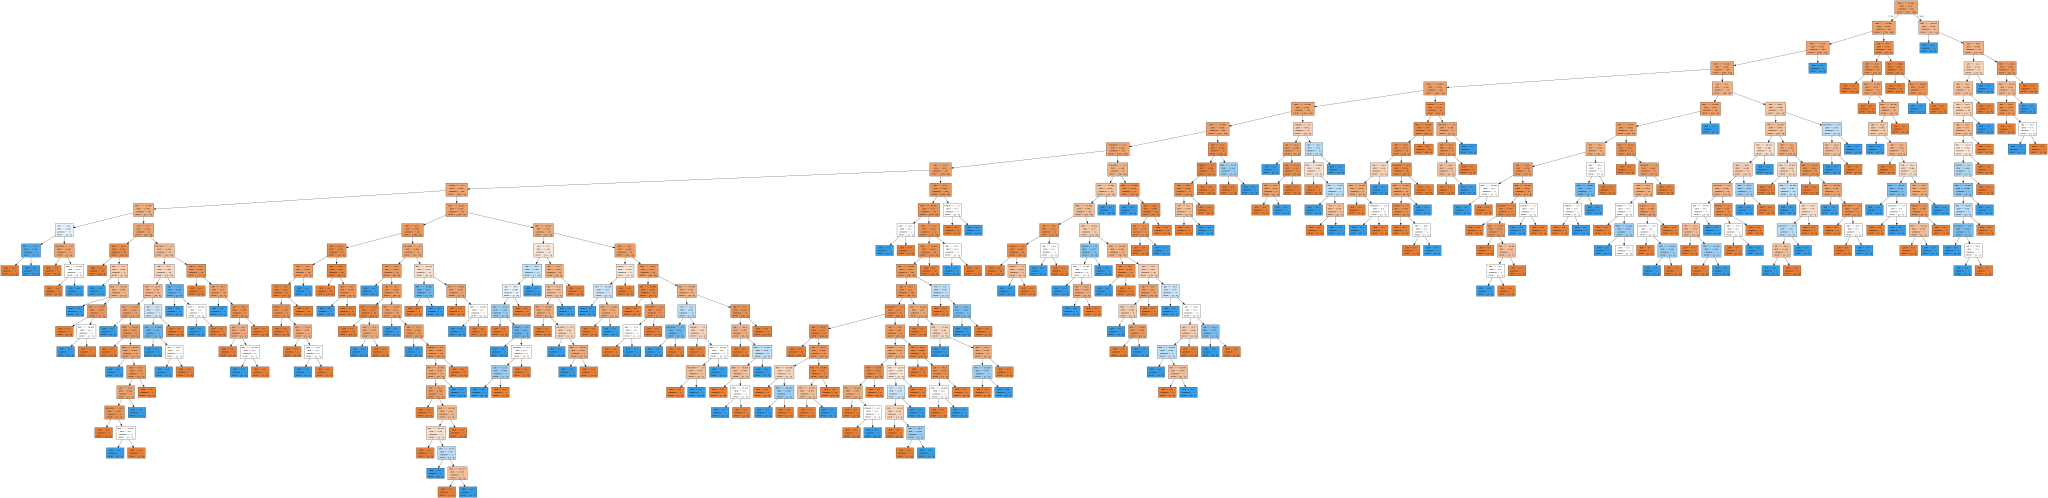

In [15]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [16]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

# Evaluation in terms of confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, plot_roc_curve

Precision, Recall, f1-score from classification report

In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.81      0.77      0.79       323
         yes       0.22      0.27      0.24        79

    accuracy                           0.67       402
   macro avg       0.52      0.52      0.52       402
weighted avg       0.70      0.67      0.68       402



In [19]:
cnf_matrix = confusion_matrix(y_test, pred)

In [20]:
cnf_matrix

array([[249,  74],
       [ 58,  21]], dtype=int64)

Plotting confusion matrix 

In [21]:
import seaborn as sns

<AxesSubplot:>

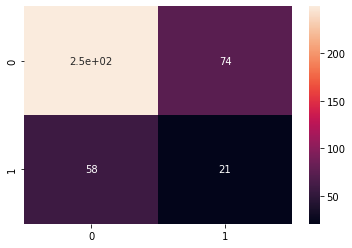

In [22]:
sns.heatmap(cnf_matrix, annot= True)

Plotting Roc_Curve

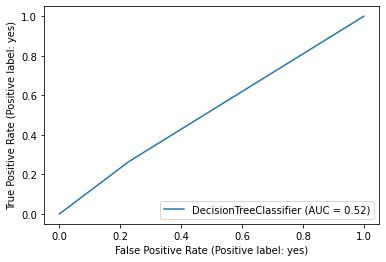

In [23]:
plot_roc_curve(clf,x_test,y_test)

Plotting straight Line

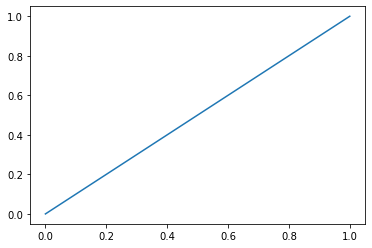

In [24]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1])

Plotting roc_curve & straight line together

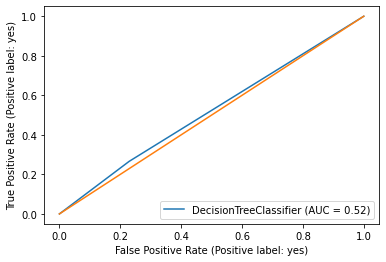

In [25]:
plot_roc_curve(clf,x_test,y_test)
plt.plot([0,1],[0,1])

AUC is 0.53, so no descrimination, it's like coin toss- either it can be head or tail, model does not learn.

True Positive, False Negative, False Positive, True Negative finding out

In [26]:
tp, fn, fp, tn = cnf_matrix.reshape(-1)

In [27]:
tp

249

In [28]:
fn

74

In [29]:
fp

58

In [30]:
tn

21

# Accuracy: (tp + tn) / (tp+fp+tn+fn)

In [31]:
acc = (tp+tn) / (tp+fp+tn+fn)
acc

0.6716417910447762

# Precision or Positive Predictive Value: tp / (tp + fp)

In [32]:
precision = tp / (tp+fp)
precision

0.8110749185667753

# Sensitivity, Recall, Hit Rate or True Positive rate: tp / (tp + fn)

In [33]:
recall = tp / (tp + fn)
recall

0.7708978328173375

# False positive rate or 1-specificity : fp / (fp + tn)

In [34]:
fpr = fp / (fp + tn)
fpr

0.7341772151898734

# F1 Measure

In [35]:
f1_measure = (precision + recall) / 2
f1_measure

0.7909863756920563

# Harmonic Mean or F1 Score : ( 2 * precision * recall ) / ( precision + recall )

In [36]:
f1_score = ( 2 * precision * recall) / (precision + recall)
f1_score

0.7904761904761906

# Specificity, Selectivity or True Negative Rate: tn / ( tn + fp ) 

In [37]:
tnr = tn / ( tn + fp )
tnr

0.26582278481012656

# Threat Score or critical success index: tp / ( tp + fp + fn)

In [38]:
csi = tp / (tp + fp + fn)
csi

0.6535433070866141

# False Discovery Rate: fp / ( fp + tp )

In [39]:
fdr = fp / (fp + tp)
fdr

0.18892508143322476

# Balanced Accuracy: BA = (tpr + tnr) / 2

In [41]:
tpr = recall # since recall is true positive rate
ba = (tpr + tnr) / 2 
ba

0.5183603088137321

# Informedness or  Bookmaker Informedness: tpr + tnr - 1

In [42]:
bm = tpr + tnr -1
bm

0.03672061762746415

# Markrdness(MK) or deltap : ppv + npv - 1

In [43]:
ppv = precision # since precision is ppv
npv = tn / (tn + fn) # negative predictive value = tn / (tn+fn)
mk = ppv + npv - 1
mk

0.03212755014572255

# Mathews Correlation Coefficient(MCC): (tp * tn - fp * fn) / sqrt( (tp + fp) *(tp+fn) * (tn+fp) * (tn+fn))

In [44]:
import math
mcc = (tp * tn - fp * fn)/ math.sqrt((tp+fp) * (tp+fn) * (tn+fp) * (tn+fn))
mcc

0.03434739413999637

# Fawlkes-Mallows Index(FM): sqrt( (tp / (tp+fp) ) * (tp / (tp+fn)))

In [45]:
fm = math.sqrt((tp/(tp+fp)) * (tp/(tp+fn)))
fm

0.7907312419372499